In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



## Question 1

In [2]:
df = pd.read_excel('flight_price.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
df.shape

(10683, 11)

There are 10683 rows and 11 columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


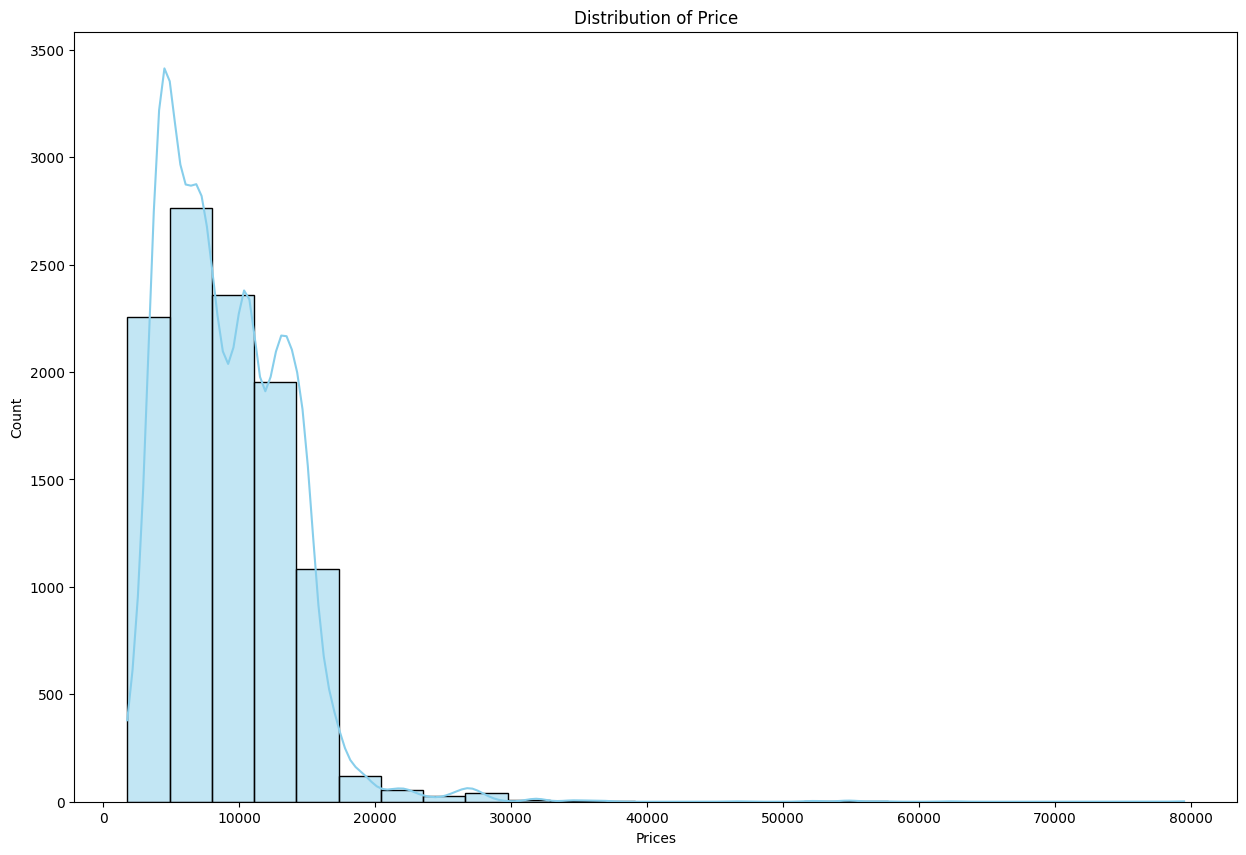

In [5]:
plt.figure(figsize=(15,10))
sns.histplot(df['Price'],bins=25,edgecolor='black',color='skyblue',kde=True)
plt.title('Distribution of Price')
plt.xlabel('Prices')
plt.show()

- As we can see that distribution of price is right skewed.
- Price is mostly concentrated between 1500 and 15000

In [6]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


- From the above table we can see that minimum price is `1759` and maximum price is `79512`

## Question 4

<Figure size 3000x1500 with 0 Axes>

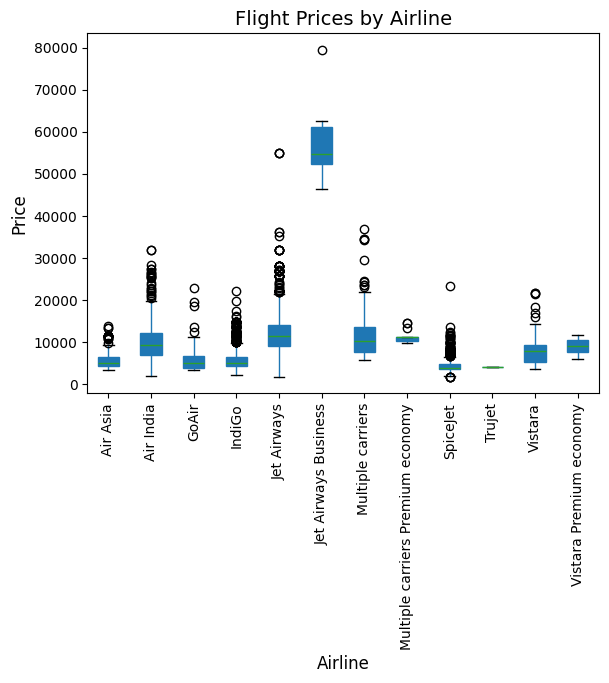

In [7]:
plt.figure(figsize=(30,15))
df.boxplot(column='Price',by='Airline',grid=False,patch_artist=True)

plt.title('Flight Prices by Airline',fontsize=14)
plt.suptitle('')  # Remove default subtitle
plt.xlabel('Airline', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(rotation=90)
plt.show()

## Question 5

<Axes: >

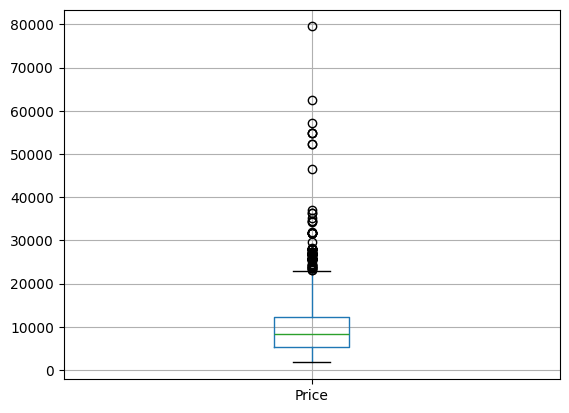

In [8]:
df.boxplot(column='Price')

- We can se that there are potential outlier from the above boxplot

In [9]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [10]:
dfc = pd.read_excel('flight_price_CLEANED.xlsx')
dfc.head()

,Unnamed: 0,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hours,Arrival_minutes,Dep_hours,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,7,3897,24,3,2019,1,10,22,...,0,0,0,0,0,0,0,0,0,1
1,1,2,7,7662,1,5,2019,13,15,5,...,0,0,1,0,1,0,0,0,0,0
2,2,2,7,13882,9,6,2019,4,25,9,...,0,1,0,0,0,1,0,0,0,0
3,3,1,7,6218,12,5,2019,23,30,18,...,0,0,1,0,1,0,0,0,0,0
4,4,1,7,13302,1,3,2019,21,35,16,...,0,0,0,0,0,0,0,0,0,1


In [11]:
dfc['Month'].unique()

array([3, 5, 6, 4])

In [12]:
month_values = dfc['Month'].value_counts()

## Question 6

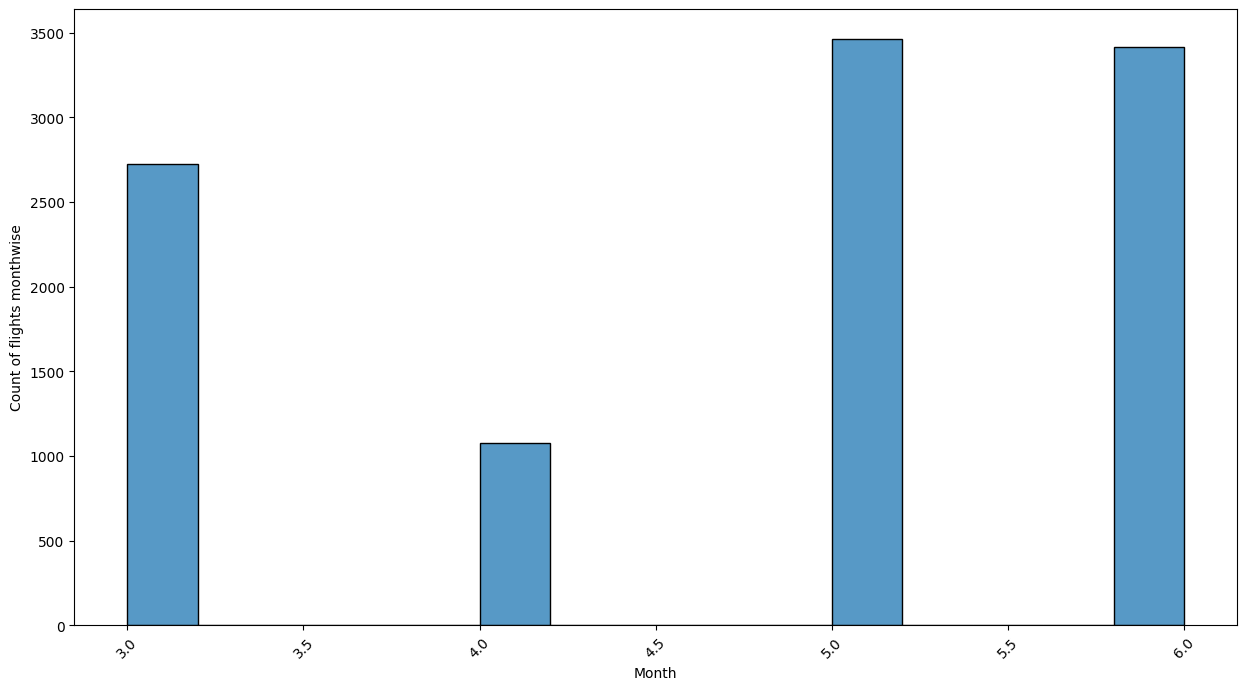

In [13]:
plt.figure(figsize=(15,8))
sns.histplot(dfc['Month'],edgecolor = 'black')
plt.xlabel("Month")
plt.ylabel('Count of flights monthwise')
plt.xticks(rotation=45)
plt.show()

- Therefore from the above graph we can conclude that most of the flights take place in the month of `5` and `6` i.e. `May` and `June`

In [14]:
dfc.shape

(10683, 36)

In [15]:
dfc.columns

Index(['Unnamed: 0', 'Total_Stops', 'Additional_Info', 'Price', 'Date',
       'Month', 'Year', 'Arrival_hours', 'Arrival_minutes', 'Dep_hours',
       'Dep_min', 'Duration_hours', 'Duration_min', 'Airline_Air Asia',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

## Question 8

- To analyse which feature are affecting the target variable we can use the heatmap,

In [16]:
corr_matrix = dfc.corr()

In [17]:
corr_with_price = corr_matrix[['Price']].sort_values(by='Price',ascending=False)


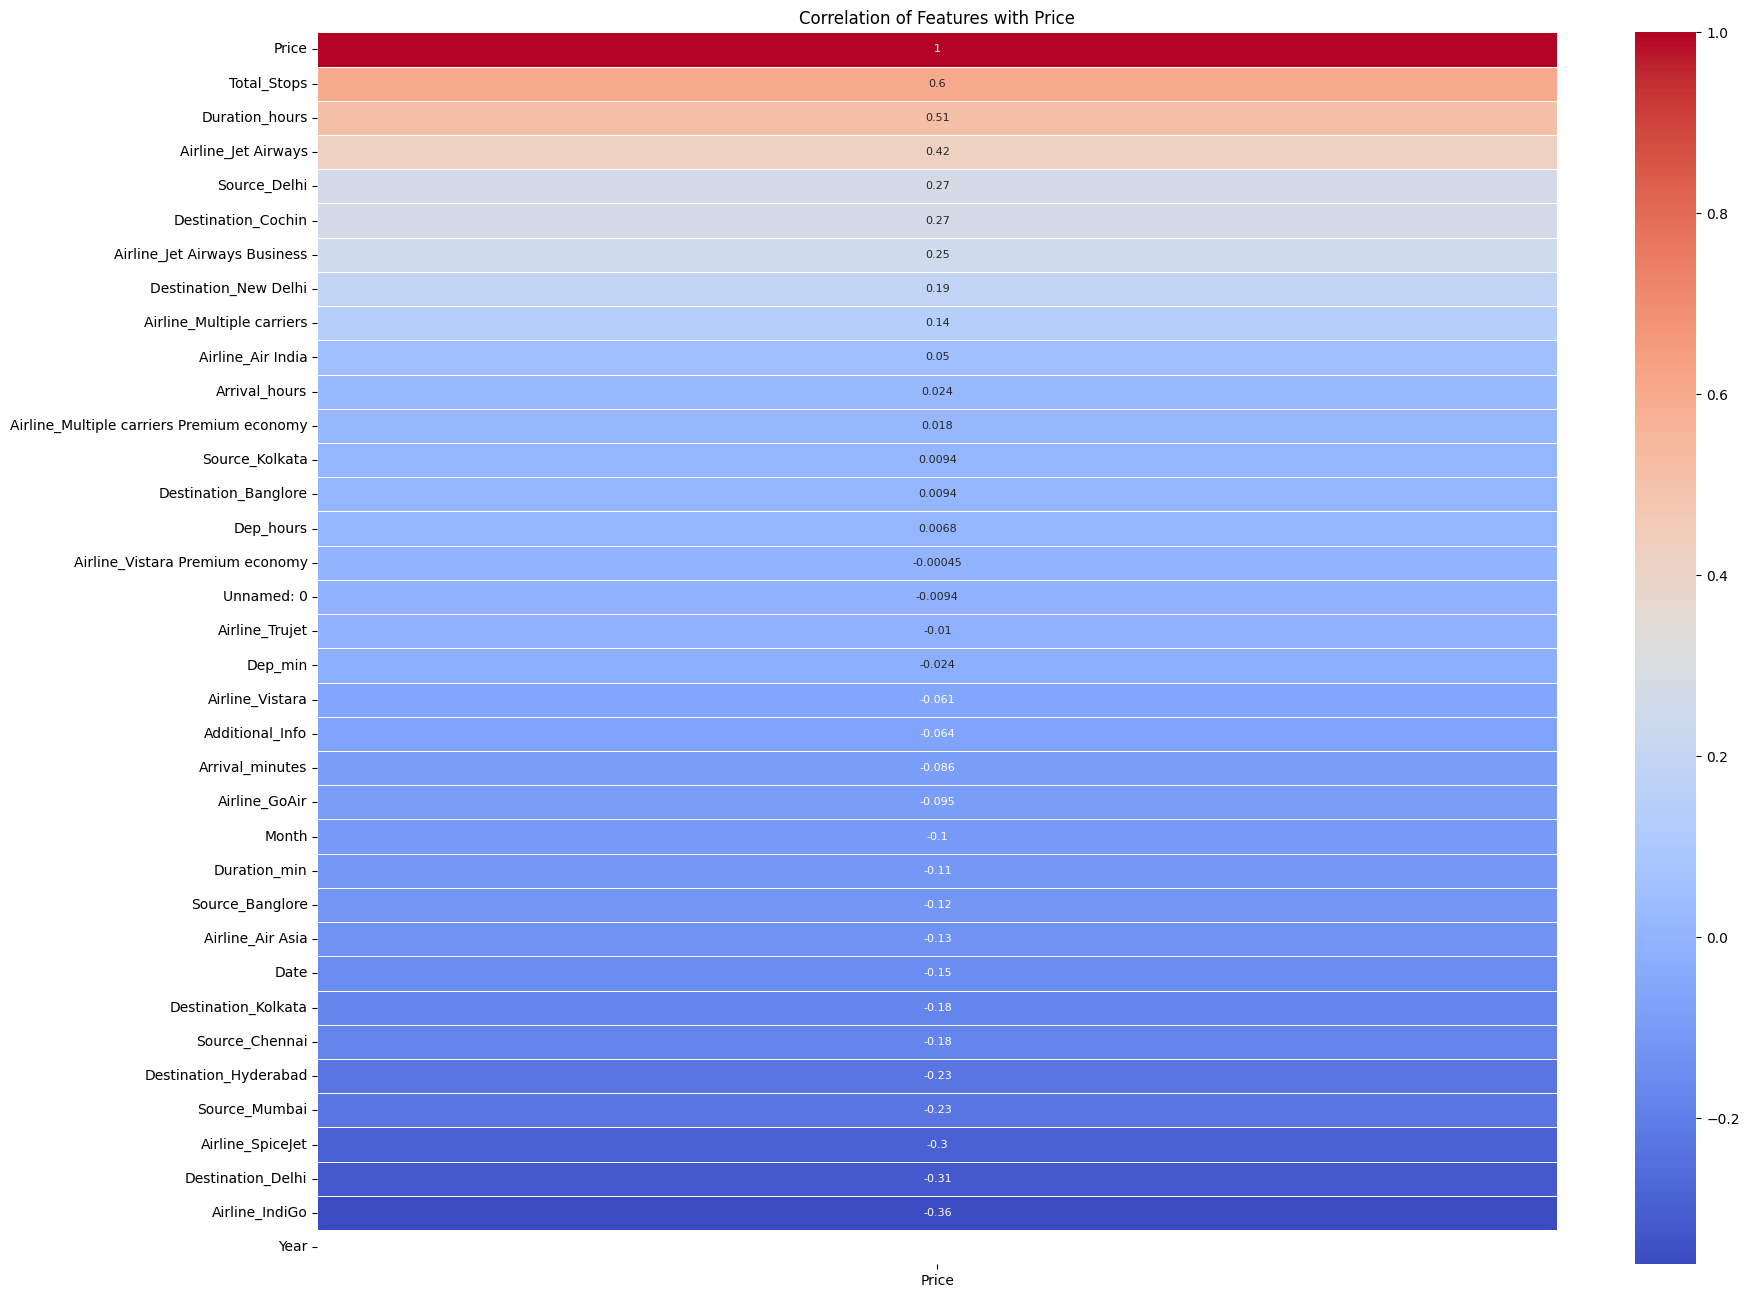

In [18]:
plt.figure(figsize=(20,16))
sns.heatmap(corr_with_price,annot=True,cmap='coolwarm',linewidths=0.5,annot_kws={'size':8})
plt.title("Correlation of Features with Price")
plt.show()

### Observations
Note: Blocks with more saturation towards red side are highly correlated with price and more Blue are negatively correlated to the Price

- `Total_Stops` is highly correlated to price dataset and therefore it will affect `Price` feature more.
- `Duration_hours` represent the duration of flights in hours, ofcourse they will affect the `Price` feature.
- `Airline_Jet_Airways` feature is also somehow affecting the `Price` feature.

These above feature are affecting the flight prices, if we somehow manage these features then we can deacrease the prices of the flights. If prices are decreased then there will be more number of people who will board our plane.

e.g - If Increase the number of stops (in a limit) and make the plane to go via popular routes than average ticket price can be decreased.

## Question 9 

In [2]:
dfg = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')

In [3]:
dfg.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [59]:
dfg.shape

(10841, 13)

- There are 10841 rows and 13 columns

In [60]:
dfg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
from sklearn.preprocessing import LabelEncoder


In [5]:
encoder = LabelEncoder()

In [6]:
dfg['Category'] = encoder.fit_transform(dfg['Category'])

In [7]:
dfg['Category'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 13, 14, 16, 17, 18, 19,
       15, 12, 21, 28, 27, 25, 29, 31, 30, 24, 26, 23, 33, 32, 22, 20,  0])

## Question 10

(0.0, 6.0)

<Figure size 1500x1000 with 0 Axes>

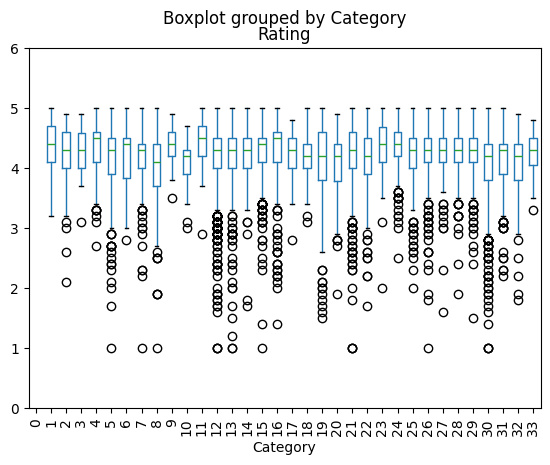

In [8]:
plt.figure(figsize=(15,10))
dfg.boxplot(column='Rating',by='Category',grid=False)
plt.xticks(rotation = 90)
plt.ylim(0,6)

## Question 11

In [66]:
dfg.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

- Yes there are `1474` missing value in `Rating` feature. 
- It will drastically imapact the observation.

## Question 12

In [67]:
dfg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  int64  
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


In [68]:
dfg.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,1,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,1,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [66]:
dfg_copy = dfg.copy()



In [24]:
dfg_copy.isnull().sum()


App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [28]:
chars_to_remove = ['+',',']
for i in chars_to_remove:
    dfg_copy['Size'] = dfg_copy['Size'].str.replace(i,"")

In [33]:
dfg_copy['Size'].sort_values(ascending=False)

2299     100000.0
5865     100000.0
5862     100000.0
1988     100000.0
1793     100000.0
           ...   
10713         NaN
10725         NaN
10765         NaN
10826         NaN
10839         NaN
Name: Size, Length: 10841, dtype: float64

In [29]:

dfg_copy['Size'] = dfg_copy['Size'].str.replace('M', '000')
dfg_copy['Size'] = dfg_copy['Size'].str.replace('k', '')
dfg_copy['Size'] = dfg_copy['Size'].replace('Varies with device', np.nan)
dfg_copy['Size'] = dfg_copy['Size'].astype(float)


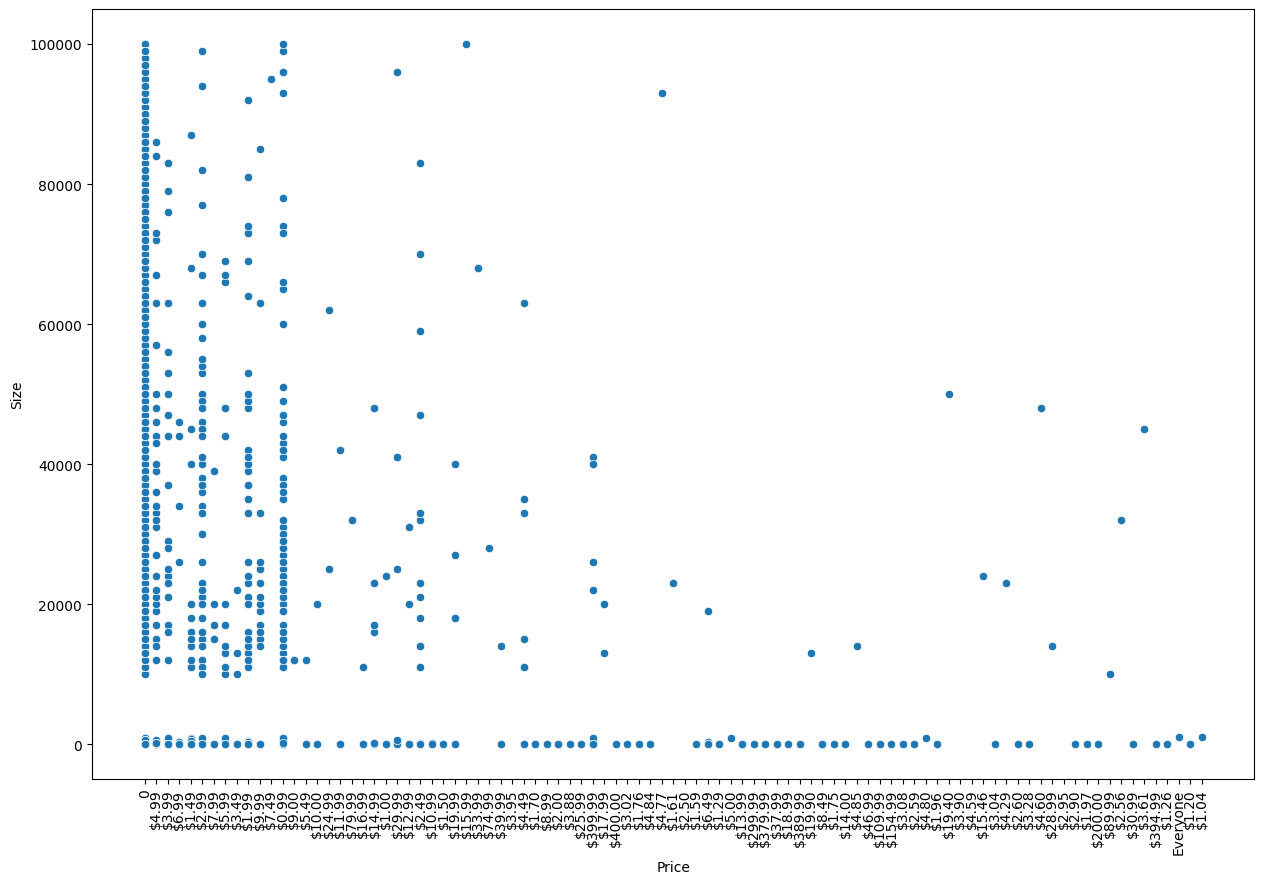

In [37]:
sort_price = dfg_copy['Price'].sort_values(ascending=True)
plt.figure(figsize=(15,10))
sns.scatterplot(y='Size',x=sort_price,data=dfg_copy)
plt.xlabel("Price")
plt.ylabel("Size")
plt.xticks(rotation=90)
plt.show()

## Observations 
- Free Apps are the most downloaded ones
- Apps price between $0 - $10 are the second most downloaded

In [67]:
dfg_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,1,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,1,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [69]:
dfg_copy['Type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [59]:
dfg_copy.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [70]:
dfg_copy = dfg_copy.dropna(subset=['Type'])

In [71]:
dfg_copy['Type'].unique()

array(['Free', 'Paid', '0'], dtype=object)

In [73]:
dfg_copy['Type'] = dfg_copy['Type'].str.replace('Free','0')
dfg_copy['Type'] = dfg_copy['Type'].str.replace('Paid','1')
# dfg_copy['Type'] = dfg_copy['Type'].str.replace('Free',0)

In [75]:
dfg_copy['Type']=dfg_copy['Type'].astype(int)

In [86]:
dfg_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  int64  
 2   Rating          9367 non-null   float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10840 non-null  int64  
 7   Price           10840 non-null  object 
 8   Content Rating  10839 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10837 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage: 1.2+ MB


In [88]:
char_to_remove = ['$']
col = dfg_copy['Price']
for item in char_to_remove:
    dfg_copy['Price'] = dfg_copy['Price'].str.replace(item,'')

In [95]:
dfg_copy['Price']=dfg_copy['Price'].str.replace('Everyone','0')

In [97]:
dfg_copy['Price']=dfg_copy['Price'].astype(float)

In [98]:
average_prices = dfg_copy.groupby('Type')['Price'].mean().reset_index()

In [76]:
dfg_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,1,4.1,159,19M,"10,000+",0,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,1,3.9,967,14M,"500,000+",0,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


## Question 13

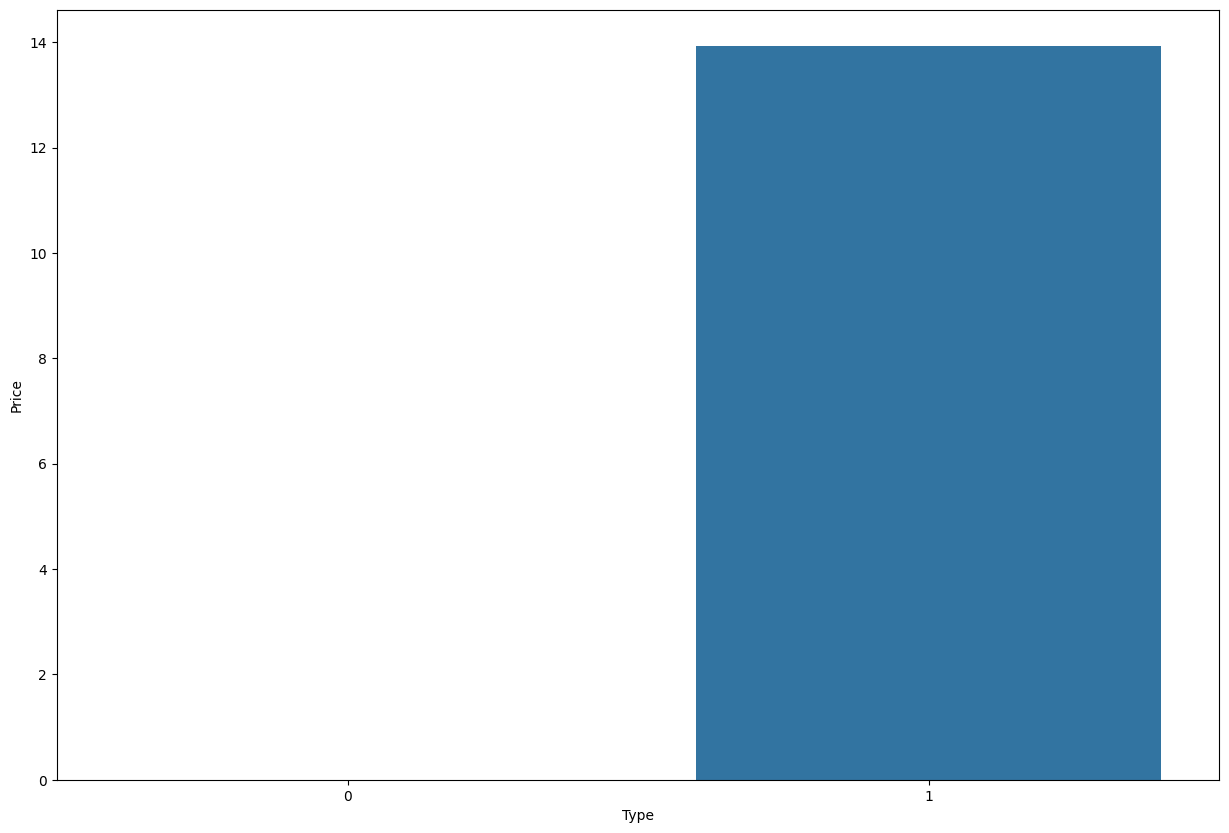

In [101]:
plt.figure(figsize=(15,10))
sns.barplot(x='Type', y='Price', data=average_prices)
plt.xlabel("Type")
plt.ylabel('Price')
plt.xticks(rotation=0)
plt.show()

## Observations 
- average price of apps is $14

In [103]:
df_copy = pd.read_csv("Google app cleaned data.csv")

In [105]:
df_copy.head(2)

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Day,Month,Year
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,7,1,2018
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15,1,2018


In [159]:
dfg_sorted = df_copy.sort_values(by='Installs',ascending=False)

In [160]:
dfg_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9659 entries, 2977 to 4956
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   int64  
 7   Type            9658 non-null   object 
 8   Price           9659 non-null   float64
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
 13  Day             9659 non-null   int64  
 14  Month           9659 non-null   int64  
 15  Year            9659 non-null   int64  
dtypes: float64(3), int64(6), object(7)
memory usage: 1.3+ MB


In [161]:
dfg_sorted['Installs'].unique()

array([1000000000,  500000000,  100000000,   50000000,   10000000,
          5000000,    1000000,     500000,     100000,      50000,
            10000,       5000,       1000,        500,        100,
               50,         10,          5,          1,          0])

In [162]:
char_to_remove = [',']

for item in char_to_remove:
    dfg_sorted['Installs'] = dfg_sorted['Installs'].str.replace(item,'')

AttributeError: Can only use .str accessor with string values!

In [143]:
dfg_sorted['Installs'] = dfg_sorted['Installs'].str.replace('Free','0')

In [163]:
dfg_sorted['Installs']=dfg_sorted['Installs'].astype(int)

In [164]:
top_10_apps = dfg_sorted.head(10)

In [165]:
top_10_apps

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Day,Month,Year
2977,3736,Google News,NEWS_AND_MAGAZINES,3.9,877635,13000.0,1000000000,Free,0.0,Teen,News & Magazines,5.2.0,4.4 and up,1,8,2018
2012,2554,Google+,SOCIAL,4.2,4831125,NaN,1000000000,Free,0.0,Teen,Social,Varies with device,Varies with device,26,7,2018
1356,1654,Subway Surfers,GAME,4.5,27722264,76000.0,1000000000,Free,0.0,Everyone 10+,Arcade,1.90.0,4.1 and up,12,7,2018
152,152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,NaN,1000000000,Free,0.0,Teen,Books & Reference,Varies with device,Varies with device,3,8,2018
2908,3665,YouTube,VIDEO_PLAYERS,4.3,25655305,NaN,1000000000,Free,0.0,Teen,Video Players & Editors,Varies with device,Varies with device,2,8,2018
2003,2545,Instagram,SOCIAL,4.5,66577313,NaN,1000000000,Free,0.0,Teen,Social,Varies with device,Varies with device,31,7,2018
2930,3687,Google Play Movies & TV,VIDEO_PLAYERS,3.7,906384,NaN,1000000000,Free,0.0,Teen,Video Players & Editors,Varies with device,Varies with device,6,8,2018
2191,2808,Google Photos,PHOTOGRAPHY,4.5,10858556,NaN,1000000000,Free,0.0,Everyone,Photography,Varies with device,Varies with device,6,8,2018
2429,3127,Google Street View,TRAVEL_AND_LOCAL,4.2,2129689,NaN,1000000000,Free,0.0,Everyone,Travel & Local,Varies with device,Varies with device,6,8,2018
701,865,Google Play Games,ENTERTAINMENT,4.3,7165362,NaN,1000000000,Free,0.0,Teen,Entertainment,Varies with device,Varies with device,16,7,2018


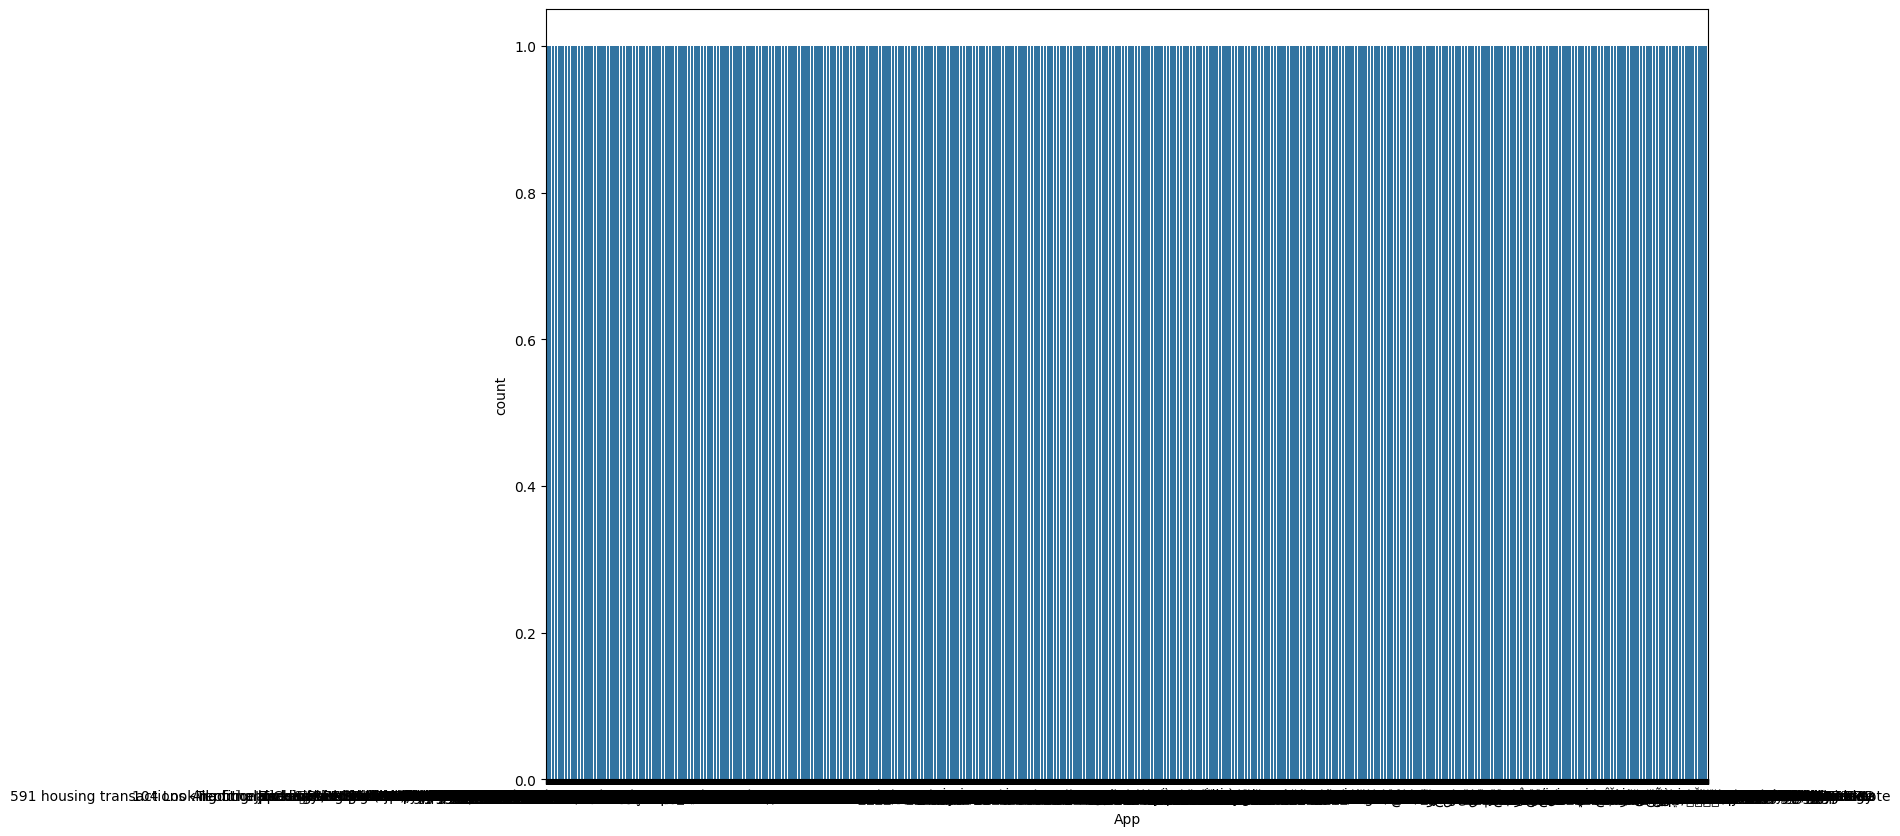

In [170]:
plt.figure(figsize=(15,10))
sns.countplot(x='App',data=df_copy)
plt.show()

## Question 14

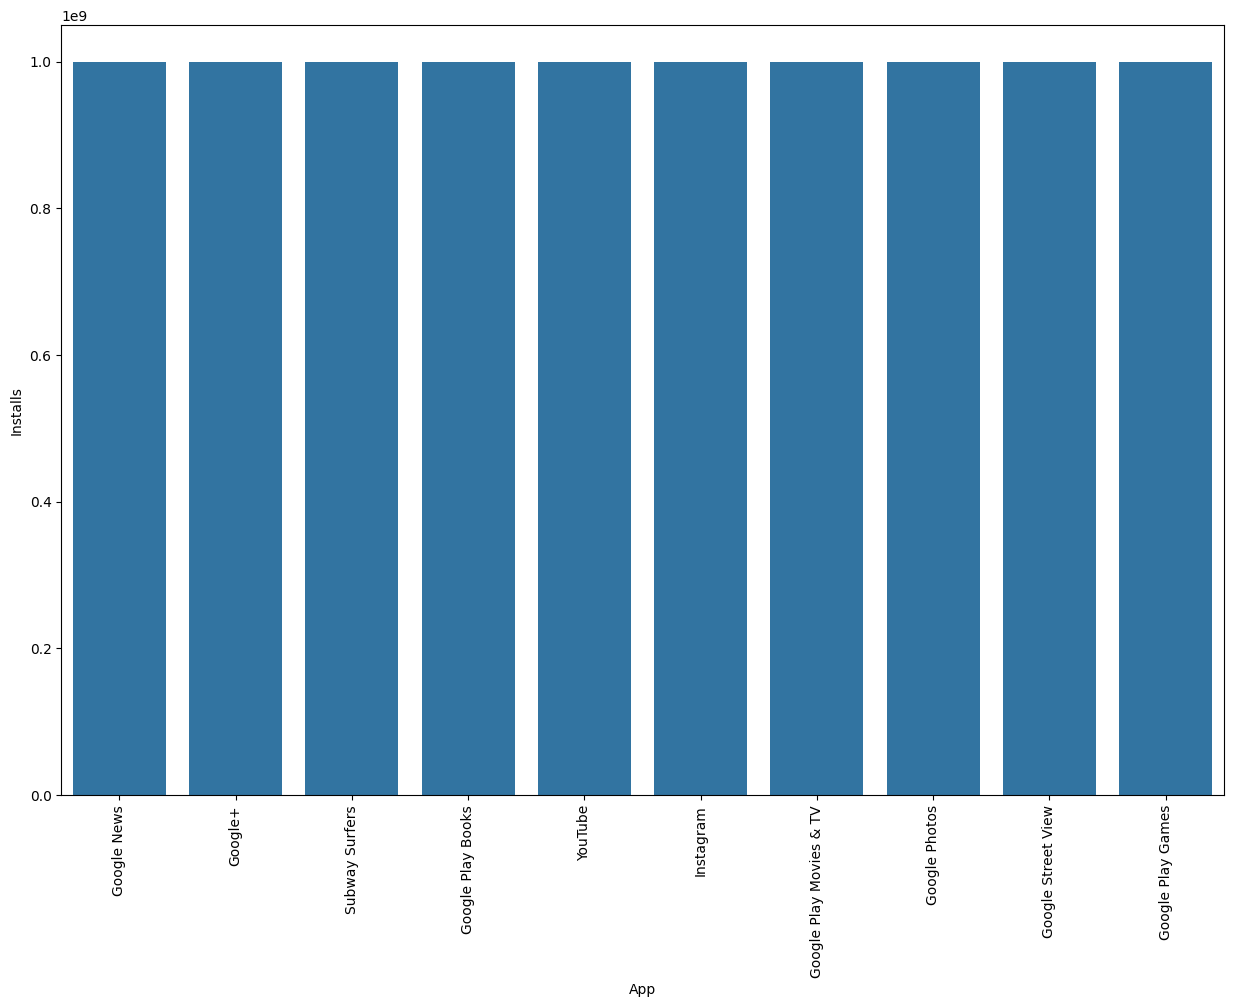

In [169]:
plt.figure(figsize=(15,10))
sns.barplot(y='Installs',x='App', data=top_10_apps)
plt.xticks(rotation=90)
plt.show()

## Question 15

<Axes: ylabel='count'>

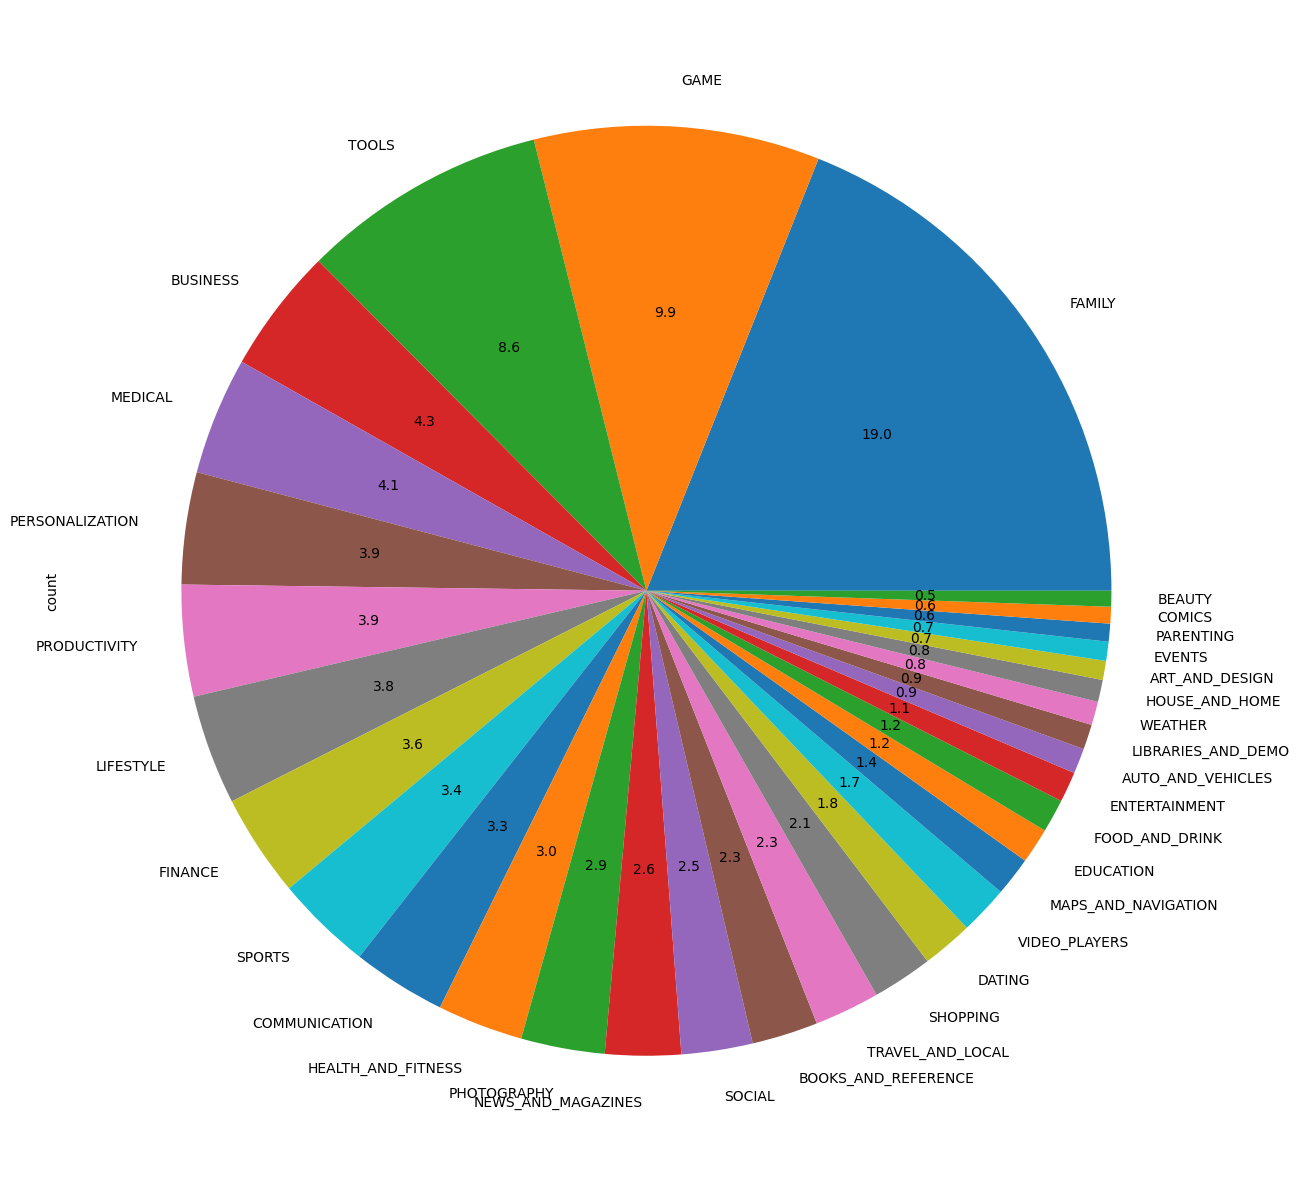

In [148]:
df_copy['Category'].value_counts().plot.pie(y=df_copy['Category'],figsize =(15,16),autopct = "%1.1f")

- Most Popular categories in the playstore is `Family`,`Games`,`Tools`

In [152]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   int64  
 7   Type            9658 non-null   object 
 8   Price           9659 non-null   float64
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
 13  Day             9659 non-null   int64  
 14  Month           9659 non-null   int64  
 15  Year            9659 non-null   int64  
dtypes: float64(3), int64(6), object(7)
memory usage: 1.2+ MB


## Question 16

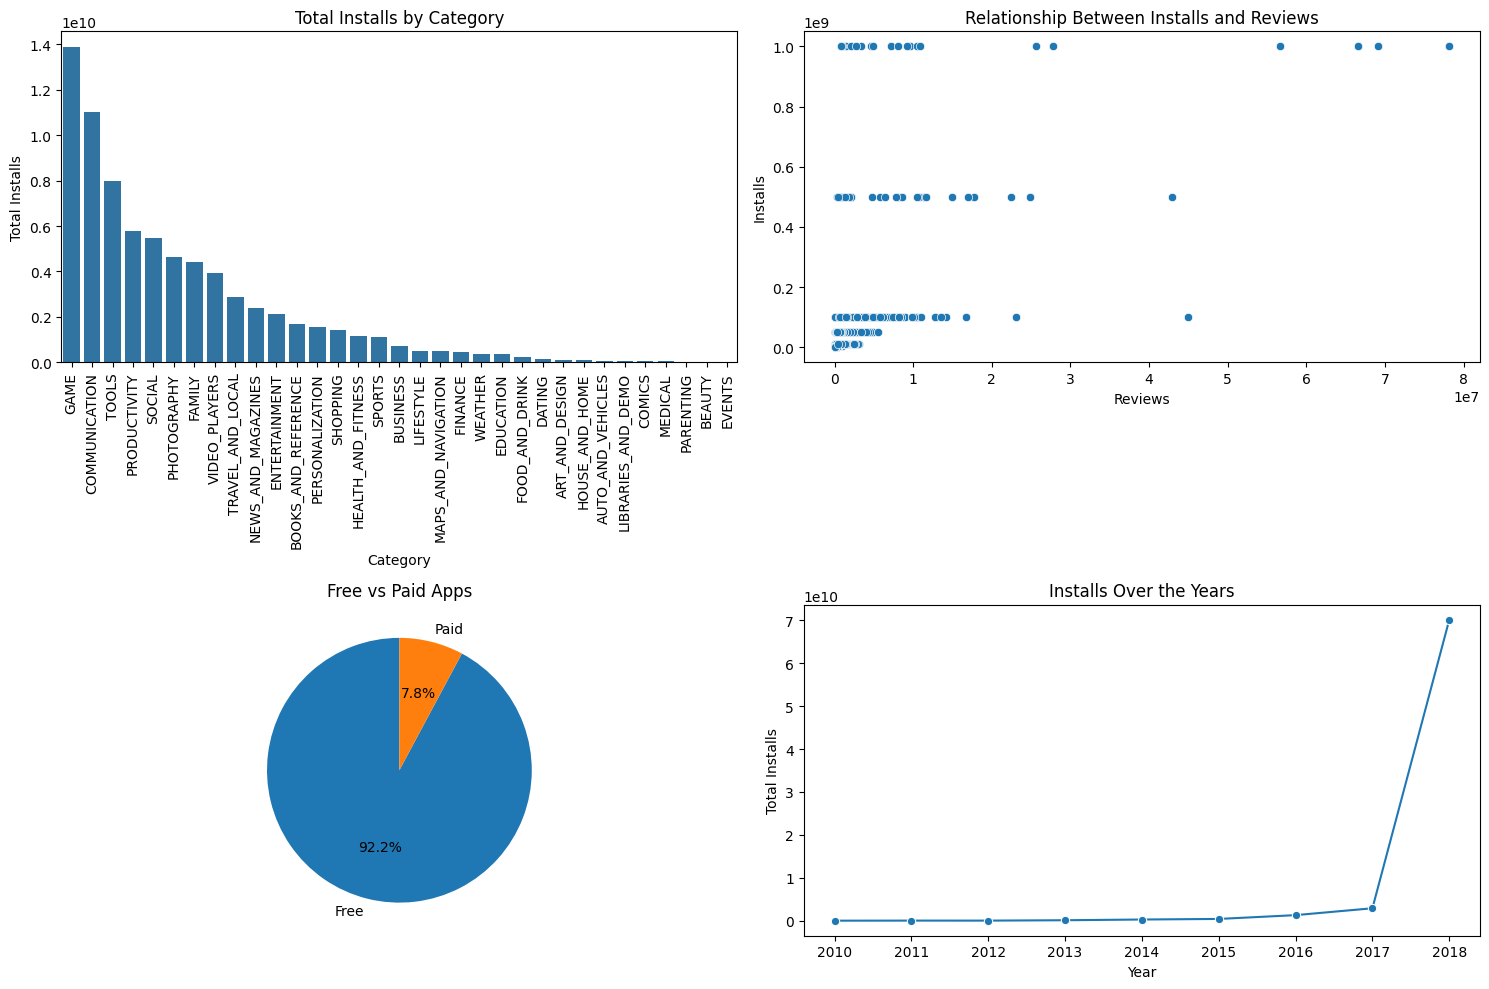

In [153]:
plt.figure(figsize=(15, 10))

# 1. Bar Chart - Number of installs by category
plt.subplot(2, 2, 1)
category_installs = df_copy.groupby('Category')['Installs'].sum().sort_values(ascending=False)
sns.barplot(x=category_installs.index, y=category_installs.values)
plt.xticks(rotation=90)
plt.title('Total Installs by Category')
plt.ylabel('Total Installs')

# 2. Scatter Plot - Relationship between Installs and Reviews
plt.subplot(2, 2, 2)
sns.scatterplot(x='Reviews', y='Installs', data=df_copy)
plt.title('Relationship Between Installs and Reviews')
plt.xlabel('Reviews')
plt.ylabel('Installs')

# 3. Pie Chart - Free vs Paid Apps
plt.subplot(2, 2, 3)
free_paid_counts = df_copy['Type'].value_counts()
plt.pie(free_paid_counts, labels=free_paid_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Free vs Paid Apps')

# 4. Line Chart - Installs over time (year)
plt.subplot(2, 2, 4)
installs_by_year = df_copy.groupby('Year')['Installs'].sum()
sns.lineplot(x=installs_by_year.index, y=installs_by_year.values, marker='o')
plt.title('Installs Over the Years')
plt.ylabel('Total Installs')
plt.xlabel('Year')

plt.tight_layout()
plt.show()

## Observations 
- From bar Chart between category and Installs shows that Game,communication and Tools are popular
- Scatter plot shows that user engagement is quite difficult
- Pie Chart reveals that Free apps are most popular 
- Line chart shows installs after 2017 increased exponentially

#### In conclusion we can say that developers of `Games` , `Communication`,`Tools` and also who makes free apps are most successful developers

## Question 17

In [155]:
df_copy.head(2)

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Day,Month,Year
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,7,1,2018
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15,1,2018


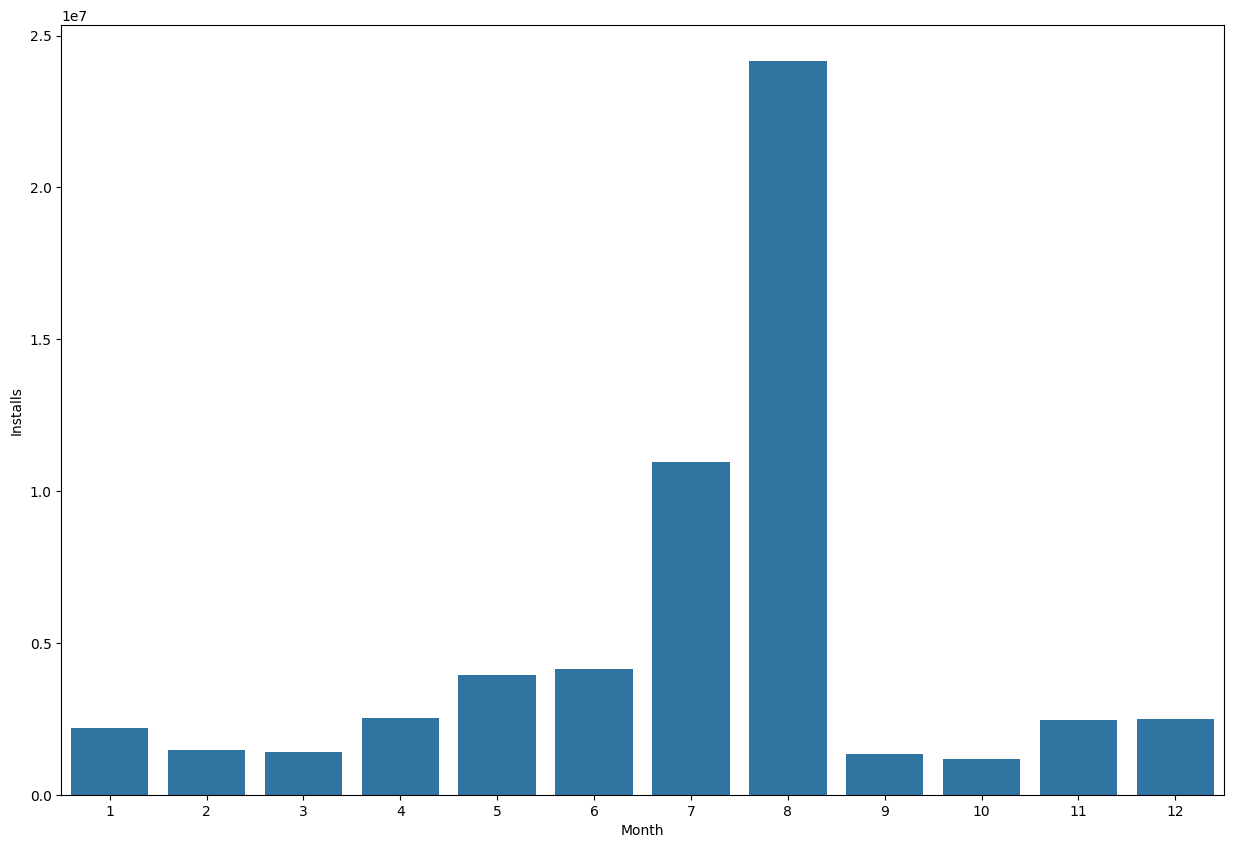

In [158]:
plt.figure(figsize=(15,10))
sns.barplot(x='Month',y='Installs',data=df_copy,ci=None)
plt.show()

## Observations
- We can clearly see that in the month of `July` and `August` has the most number of installs/downloads, so we the best time to launch an app is between these months